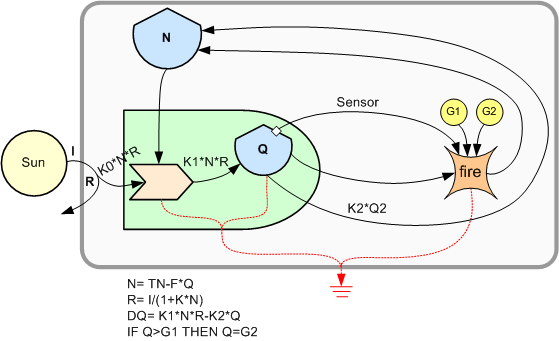

In [1]:
class Fire:
    
    def __init__(self, params):
        self.table = []
        
        self.I  = params["I"]
        self.Q  = params["Q"]
        self.NT = params["NT"]
        
        self.G1 = params["G1"]
        self.G2 = params["G2"]
        self.F  = params["F"]
        
        self.K  = params["K"]
        self.K1 = params["K1"]
        self.K2 = params["K2"]
        
        self.Q0 = params["Q0"]
        self.N0 = params["N0"]
        self.T0 = params["T0"]
        self.TF = params["TF"]   
    
    def run(self):
        for t in range(self.T0, self.TF):
            T  = t,
            
            if t == 0:
                R  = "-"
                DQ = "-"
                Q  = self.Q
            else:
                R  = self.I/(1+self.K*self.table[t-1]["N"])
                DQ = self.K1*self.table[t-1]["N"]*R-self.K2*self.table[t-1]["Q"]
                
                if self.table[t-1]["Q"]+DQ > self.G1:
                    Q = self.G2
                else:
                    Q = self.table[t-1]["Q"]+DQ
                    
            N  = self.NT-self.F*Q
            Q0 = Q*self.Q0
            N0 = N*self.N0
                
            self.table.append({ "T" : T, "R" : R, "DQ": DQ, "Q" : Q, "N" : N, "Q0": Q0, "N0": N0 })
 
        return self.table

In [2]:
sim = {
    "I":  10,
    "Q":  1000,
    "NT": 100,
    "G1": 5000,
    "G2": 2000,
    "F":  0.01,
    "K":  0.9,
    "K1": 8,
    "K2": 0.01,
    "Q0": 0.01,
    "N0": 0.9,
    "T0":  0,
    "TF": 320,
    "DT": 1
}

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(data=Fire(sim).run())

In [5]:
df[["T", "R", "DQ", "Q", "N", "Q0", "N0"]]

,T,R,DQ,Q,N,Q0,N0
0,"(0,)",-,-,1000.000000,90.000000,10.000000,81.000000
1,"(1,)",0.121951,77.8049,1077.804878,89.221951,10.778049,80.299756
2,"(2,)",0.123002,77.0175,1154.822371,88.451776,11.548224,79.606599
3,"(3,)",0.124059,76.2379,1231.060286,87.689397,12.310603,78.920457
4,"(4,)",0.125124,75.4661,1306.526355,86.934736,13.065264,78.241263
5,"(5,)",0.126197,74.7019,1381.228231,86.187718,13.812282,77.568946
6,"(6,)",0.127277,73.9453,1455.173488,85.448265,14.551735,76.903439
7,"(7,)",0.128364,73.1961,1528.369629,84.716304,15.283696,76.244673
8,"(8,)",0.129459,72.4544,1600.824077,83.991759,16.008241,75.592583
9,"(9,)",0.130561,71.7201,1672.544183,83.274558,16.725442,74.947102


In [6]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Text(0.5,0,'Tempo')

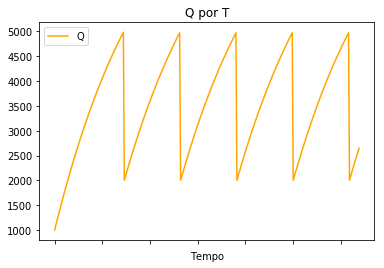

In [7]:
ax = df.plot(x='T', y='Q', c="orange", title='Q por T')

ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

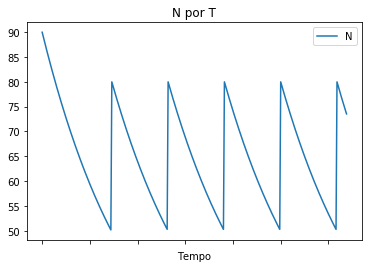

In [8]:
ax = df.plot(x='T', y='N', title='N por T')

ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

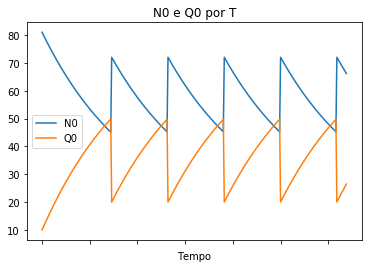

In [9]:
ax = df.plot(x='T', y=['N0', 'Q0'], title='N0 e Q0 por T')
ax.set_xlabel("Tempo")

<h3>
    01) A floresta pulsa com maior ou menor freqüência se mais nutrientes são adicionados ao sistema? O que você aumentaria no programa para descobrir? Faça-o e explique o resultado.
</h3>

In [10]:
sim1 = {
    "I":  10,
    "Q":  1000,
    "NT": 200,
    "G1": 5000,
    "G2": 2000,
    "F":  0.01,
    "K":  0.9,
    "K1": 8,
    "K2": 0.01,
    "Q0": 0.01,
    "N0": 0.9,
    "T0":  0,
    "TF": 320,
    "DT": 1
}

In [11]:
df1 = pd.DataFrame(data=Fire(sim1).run())

In [12]:
df1[["T", "R", "DQ", "Q", "N", "Q0", "N0"]]

,T,R,DQ,Q,N,Q0,N0
0,"(0,)",-,-,1000.000000,190.000000,10.000000,171.000000
1,"(1,)",0.0581395,78.3721,1078.372093,189.216279,10.783721,170.294651
2,"(2,)",0.0583789,77.5862,1155.958337,188.440417,11.559583,169.596375
3,"(3,)",0.0586179,76.8083,1232.766595,187.672334,12.327666,168.905101
4,"(4,)",0.0588564,76.0381,1308.804650,186.911954,13.088046,168.220758
5,"(5,)",0.0590944,75.2756,1384.080209,186.159198,13.840802,167.543278
6,"(6,)",0.0593319,74.5207,1458.600900,185.413991,14.586009,166.872592
7,"(7,)",0.059569,73.7734,1532.374278,184.676257,15.323743,166.208631
8,"(8,)",0.0598055,73.0335,1605.407820,183.945922,16.054078,165.551330
9,"(9,)",0.0600416,72.3011,1677.708928,183.222911,16.777089,164.900620


Text(0.5,0,'Tempo')

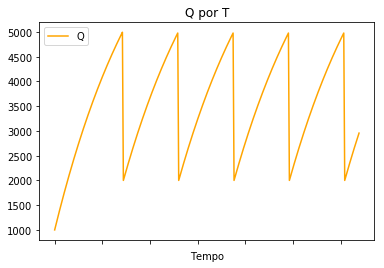

In [13]:
ax = df1.plot(x='T', y='Q', c="orange", title='Q por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

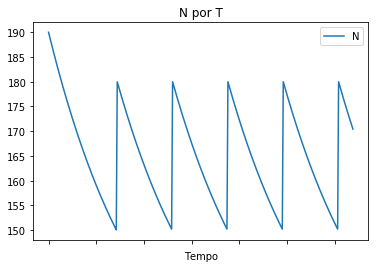

In [14]:
ax = df1.plot(x='T', y='N', title='N por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

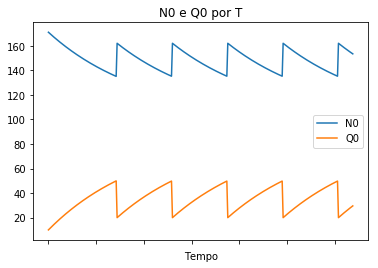

In [15]:
ax = df1.plot(x='T', y=['N0', 'Q0'], title='N0 e Q0 por T')
ax.set_xlabel("Tempo")

<h3>
    02) Se o fogo for apagado pelos bombeiros quando ele já havia queimado cerca de três-quartos de grama. O que aconteceria com o tempo do pulso? <br> <br>Mude o programa para que quando o fogo chegue Q diminui para 0.75 de G1. Execute o programa. Sua hipótese estava correta?
</h3>

In [16]:
sim2 = {
    "I":  10,
    "Q":  1000,
    "NT": 100,
    "G1": 5000*0.75,
    "G2": 2000,
    "F":  0.01,
    "K":  0.9,
    "K1": 8,
    "K2": 0.01,
    "Q0": 0.01,
    "N0": 0.9,
    "T0":  0,
    "TF": 320,
    "DT": 1
}

In [17]:
df2 = pd.DataFrame(data=Fire(sim2).run())

In [18]:
df2[["T", "R", "DQ", "Q", "N", "Q0", "N0"]]

,T,R,DQ,Q,N,Q0,N0
0,"(0,)",-,-,1000.000000,90.000000,10.000000,81.000000
1,"(1,)",0.121951,77.8049,1077.804878,89.221951,10.778049,80.299756
2,"(2,)",0.123002,77.0175,1154.822371,88.451776,11.548224,79.606599
3,"(3,)",0.124059,76.2379,1231.060286,87.689397,12.310603,78.920457
4,"(4,)",0.125124,75.4661,1306.526355,86.934736,13.065264,78.241263
5,"(5,)",0.126197,74.7019,1381.228231,86.187718,13.812282,77.568946
6,"(6,)",0.127277,73.9453,1455.173488,85.448265,14.551735,76.903439
7,"(7,)",0.128364,73.1961,1528.369629,84.716304,15.283696,76.244673
8,"(8,)",0.129459,72.4544,1600.824077,83.991759,16.008241,75.592583
9,"(9,)",0.130561,71.7201,1672.544183,83.274558,16.725442,74.947102


Text(0.5,0,'Tempo')

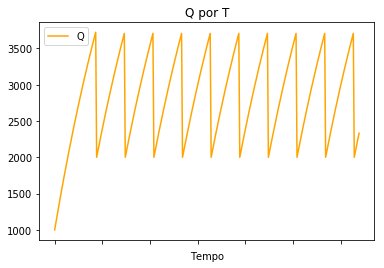

In [19]:
ax = df2.plot(x='T', y='Q', c="orange", title='Q por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

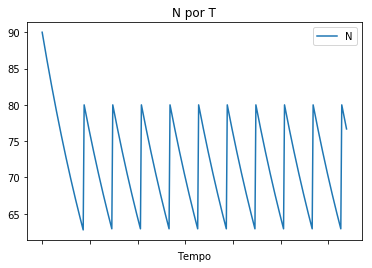

In [20]:
ax = df2.plot(x='T', y='N', title='N por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

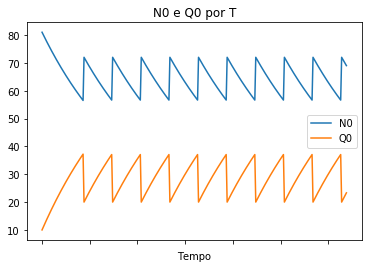

In [21]:
ax = df2.plot(x='T', y=['N0', 'Q0'], title='N0 e Q0 por T')
ax.set_xlabel("Tempo")

<h3>
    03) O que ocorre com o sistema do ciclo do fogo se o fogo é eliminado completamente? Elimine esta afirmação para ver.
</h3>

In [22]:
sim3 = {
    "I":  10,
    "Q":  1000,
    "NT": 100,
    "G1": 1000,
    "G2": 2000,
    "F":  0.01,
    "K":  0.9,
    "K1": 8,
    "K2": 0.01,
    "Q0": 0.01,
    "N0": 0.9,
    "T0":  0,
    "TF": 320,
    "DT": 1
}

In [23]:
df3 = pd.DataFrame(data=Fire(sim3).run())

In [24]:
df3[["T", "R", "DQ", "Q", "N", "Q0", "N0"]]

,T,R,DQ,Q,N,Q0,N0
0,"(0,)",-,-,1000,90.0,10.0,81.0
1,"(1,)",0.121951,77.8049,2000,80.0,20.0,72.0
2,"(2,)",0.136986,67.6712,2000,80.0,20.0,72.0
3,"(3,)",0.136986,67.6712,2000,80.0,20.0,72.0
4,"(4,)",0.136986,67.6712,2000,80.0,20.0,72.0
5,"(5,)",0.136986,67.6712,2000,80.0,20.0,72.0
6,"(6,)",0.136986,67.6712,2000,80.0,20.0,72.0
7,"(7,)",0.136986,67.6712,2000,80.0,20.0,72.0
8,"(8,)",0.136986,67.6712,2000,80.0,20.0,72.0
9,"(9,)",0.136986,67.6712,2000,80.0,20.0,72.0


Text(0.5,0,'Tempo')

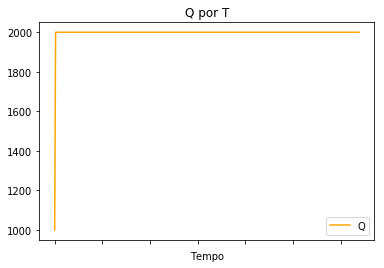

In [25]:
ax = df3.plot(x='T', y='Q', c="orange", title='Q por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

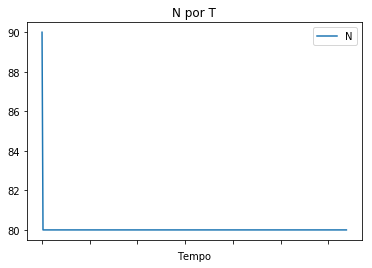

In [26]:
ax = df3.plot(x='T', y='N', title='N por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

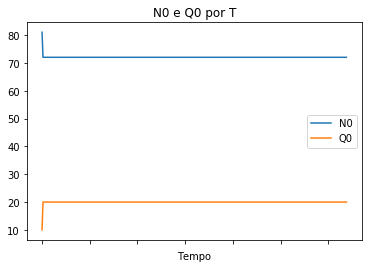

In [27]:
ax = df3.plot(x='T', y=['N0', 'Q0'], title='N0 e Q0 por T')
ax.set_xlabel("Tempo")

<h3>
    04) Abaixe o sol e a chuva (I) a metade. Com que freqüência o fogo vem? 
</h3>

In [28]:
sim4 = {
    "I":  5, #chuva
    "Q":  1000,
    "NT": 100,
    "G1": 5000,
    "G2": 2000,
    "F":  0.01,
    "K":  0.9,
    "K1": 8,
    "K2": 0.01,
    "Q0": 0.01,
    "N0": 0.9,
    "T0":  0,
    "TF": 320,
    "DT": 1
}

In [29]:
df4 = pd.DataFrame(data=Fire(sim4).run())

In [30]:
df4[["T", "R", "DQ", "Q", "N", "Q0", "N0"]]

,T,R,DQ,Q,N,Q0,N0
0,"(0,)",-,-,1000.000000,90.000000,10.000000,81.000000
1,"(1,)",0.0609756,33.9024,1033.902439,89.660976,10.339024,80.694878
2,"(2,)",0.0612033,33.5614,1067.463829,89.325362,10.674638,80.392826
3,"(3,)",0.0614305,33.2238,1100.687587,88.993124,11.006876,80.093812
4,"(4,)",0.061657,32.8895,1133.577093,88.664229,11.335771,79.797806
5,"(5,)",0.0618829,32.5586,1166.135697,88.338643,11.661357,79.504779
6,"(6,)",0.0621081,32.231,1198.366712,88.016333,11.983667,79.214700
7,"(7,)",0.0623327,31.9067,1230.273421,87.697266,12.302734,78.927539
8,"(8,)",0.0625567,31.5857,1261.859072,87.381409,12.618591,78.643268
9,"(9,)",0.0627799,31.2678,1293.126882,87.068731,12.931269,78.361858


Text(0.5,0,'Tempo')

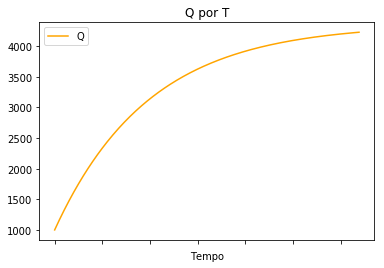

In [31]:
ax = df4.plot(x='T', y='Q', c="orange", title='Q por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

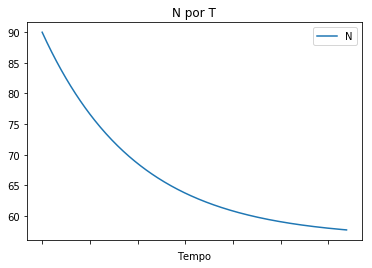

In [32]:
ax = df4.plot(x='T', y='N', title='N por T')
ax.set_xlabel("Tempo")

Text(0.5,0,'Tempo')

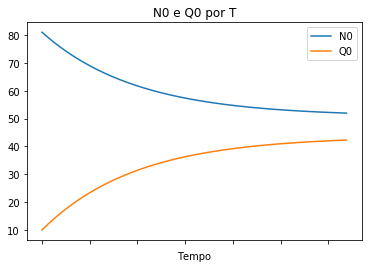

In [33]:
ax = df4.plot(x='T', y=['N0', 'Q0'], title='N0 e Q0 por T')
ax.set_xlabel("Tempo")